In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [7]:
df = pd.read_csv(data)

### exploring the dataset

In [8]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [9]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [10]:
df.num_doors.value_counts()

num_doors
 0.0    3551
 1.0    2192
-1.0    2183
-2.0     594
 2.0     563
 3.0      58
-3.0      56
-4.0       4
 4.0       1
Name: count, dtype: int64

In [11]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

### Preparing the dataset

Preparation:

Fill missing values with zeros.   
Do train/validation/test split with 60%/20%/20% distribution.   
Use the train_test_split function and set the random_state parameter to 1.   
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.   

In [12]:
df = df.fillna(0)

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [16]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [17]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [18]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [41]:
features = dv.get_feature_names_out()
features

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [20]:
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

### Question 1

Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

Train a model with max_depth=1.   
Which feature is used for splitting the data?   

'vehicle_weight'   
'model_year'   
'origin'   
'fuel_type'   

In [21]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error

In [22]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3025.74
|   |--- value: [16.86]
|--- vehicle_weight >  3025.74
|   |--- value: [12.88]



In [24]:
y_pred = dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(1.6257716971976253)

In [25]:
y_mean = np.mean(y_train)
baseline_rmse = np.sqrt(mean_squared_error(y_val, [y_mean]*len(y_val)))
baseline_rmse

np.float64(2.5938085138796043)

### Question 2

Train a random forest regressor with these parameters:   

n_estimators=10   
random_state=1   
n_jobs=-1 (optional - to make training faster)   
What's the RMSE of this model on the validation data?   

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.4504808576989446)

### Question 3

ow let's experiment with the n_estimators parameter   

Try different values of this parameter from 10 to 200 with step 10.   
Set random_state to 1.   
Evaluate the model on the validation dataset.   
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.   

In [29]:
estimators = np.arange(10, 201, 10)
scores = []
for n in estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    scores.append(rmse)

    print(f"n_estimators: {n}")
    print(rmse)
    print()

n_estimators: 10
0.4504808576989446

n_estimators: 20
0.4397151917682442

n_estimators: 30
0.4347458422409451

n_estimators: 40
0.43249376170623033

n_estimators: 50
0.43126374008664414

n_estimators: 60
0.42980115536492136

n_estimators: 70
0.4286384030975405

n_estimators: 80
0.4273189742336719

n_estimators: 90
0.42692761127311935

n_estimators: 100
0.4264016119195756

n_estimators: 110
0.4261819147858064

n_estimators: 120
0.4260500396990563

n_estimators: 130
0.42568333764511507

n_estimators: 140
0.4251126951348039

n_estimators: 150
0.42503357048326595

n_estimators: 160
0.42524638118745034

n_estimators: 170
0.4251600999193633

n_estimators: 180
0.4251422517779377

n_estimators: 190
0.4252192142957839

n_estimators: 200
0.42518052720492017



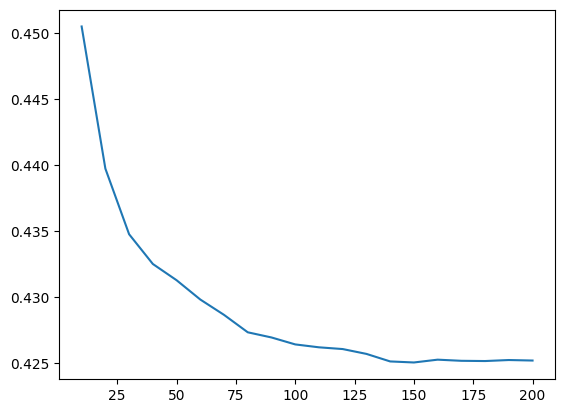

In [30]:
plt.plot(estimators, scores)

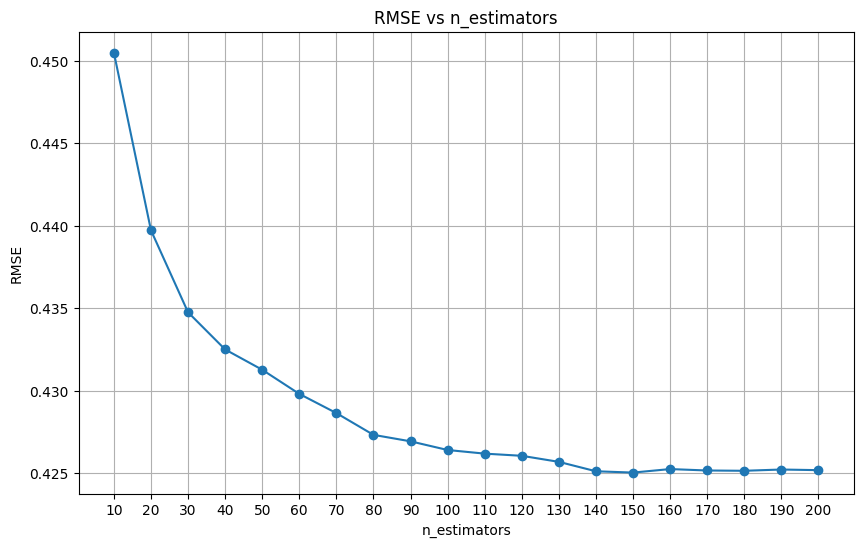

In [31]:
plt.figure(figsize=(10,6))
plt.plot(estimators, scores, marker='o')
plt.xticks(estimators)   # <--- show all estimator values as x-axis ticks
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.title("RMSE vs n_estimators")
plt.grid(True)
plt.show()


### Question 4

Let's select the best max_depth:   

Try different values of max_depth: [10, 15, 20, 25]   
For each of these values,   
try different values of n_estimators from 10 till 200 (with step 10)   
calculate the mean RMSE   
Fix the random seed: random_state=1   
What's the best max_depth, using the mean RMSE?   

In [32]:
estimators = np.arange(10, 201, 10)
scores = []
m_rmse = []

for m in [10, 15, 20, 25]:
    for n in estimators:
        
        total = 0
        
        rf = RandomForestRegressor(n_estimators=n, max_depth=m, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((m, n, rmse))

        total += rmse
        
        print(f"max_depth: {m}, n_estimators: {n}")
        print(rmse)
        print()
        
    m_rmse.append((m, total/20))

max_depth: 10, n_estimators: 10
0.43903134301288965

max_depth: 10, n_estimators: 20
0.43177997536713575

max_depth: 10, n_estimators: 30
0.42985236748349126

max_depth: 10, n_estimators: 40
0.4287113358698132

max_depth: 10, n_estimators: 50
0.42760794607634517

max_depth: 10, n_estimators: 60
0.42664182494202596

max_depth: 10, n_estimators: 70
0.4259907063547453

max_depth: 10, n_estimators: 80
0.42528911212296444

max_depth: 10, n_estimators: 90
0.4254930140108503

max_depth: 10, n_estimators: 100
0.42475512592317993

max_depth: 10, n_estimators: 110
0.424395165700721

max_depth: 10, n_estimators: 120
0.4240604105838024

max_depth: 10, n_estimators: 130
0.42381454159346443

max_depth: 10, n_estimators: 140
0.42369060978671813

max_depth: 10, n_estimators: 150
0.4236218930105527

max_depth: 10, n_estimators: 160
0.4238963921113195

max_depth: 10, n_estimators: 170
0.4239427556202148

max_depth: 10, n_estimators: 180
0.4238836360857457

max_depth: 10, n_estimators: 190
0.423892811686

In [33]:
m_rmse

[(10, np.float64(0.021199716466264666)),
 (15, np.float64(0.021272888510446914)),
 (20, np.float64(0.021271328634952527)),
 (25, np.float64(0.021261462984119003))]

In [34]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)


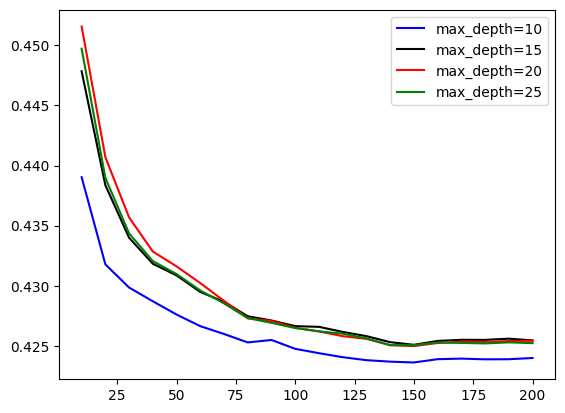

In [35]:
colors = ['blue', 'black', 'red', 'green']
values = [10, 15, 20, 25]

for m,col in zip(values, colors):
    df_subset = df_scores[df_scores.max_depth == m]

    plt.plot(df_subset.n_estimators, df_subset.rmse, color=col,
             label=f"max_depth={m}")

plt.legend()

### Question 5

We can extract feature importance information from tree-based models.   

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity    before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.   

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.   

For this homework question, we'll find the most important feature:   

Train the model with these parameters:   
n_estimators=10,   
max_depth=20,   
random_state=1,   
n_jobs=-1 (optional)   
Get the feature importance information from this model   

What's the most important feature (among these 4)?   

vehicle_weight   
horsepower   
acceleration   
engine_displacement   

In [38]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.4515653056224236)

In [43]:
importances = rf.feature_importances_

In [46]:
total = 0
for name, importance in zip(features, importances):
    print(name, ":", importance)
    total+= importance
total

acceleration : 0.011934407662240694
drivetrain=All-wheel drive : 0.0003376646771512851
drivetrain=Front-wheel drive : 0.0002925314558214247
engine_displacement : 0.0033337740950354078
fuel_type=Diesel : 0.0003130086818432394
fuel_type=Gasoline : 0.00032246713539454275
horsepower : 0.015252982394608032
model_year : 0.003434146642324707
num_cylinders : 0.0022587666932810295
num_doors : 0.0016233656621473377
origin=Asia : 0.00045905178902877123
origin=Europe : 0.0006274529793916364
origin=USA : 0.0004883163891995468
vehicle_weight : 0.9593220637425324


np.float64(1.0)

In [45]:
most_important = features[importances.argmax()]
print("Most important feature:", most_important)

Most important feature: vehicle_weight


### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:   

Install XGBoost   
Create DMatrix for train and validation   
Create a watchlist   
Train a model with these parameters for 100 rounds:   

xgb_params = {   
    'eta': 0.3,    
    'max_depth': 6,   
    'min_child_weight': 1,   
    
    'objective': 'reg:squarederror',   
    'nthread': 8,   
    
    'seed': 1,   
    'verbosity': 1,   
}   

Now change eta from 0.3 to 0.1.   

Which eta leads to the best RMSE score on the validation dataset?   

In [48]:
import xgboost as xgb

In [66]:
features = list(features)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [67]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [68]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                 verbose_eval=5,
                 evals=watchlist)

In [69]:
print(output.stdout)

[0]	train-rmse:1.82325	val-rmse:1.86908
[5]	train-rmse:0.51827	val-rmse:0.55470
[10]	train-rmse:0.38151	val-rmse:0.42851
[15]	train-rmse:0.35959	val-rmse:0.42007
[20]	train-rmse:0.34731	val-rmse:0.41964
[25]	train-rmse:0.33903	val-rmse:0.42090
[30]	train-rmse:0.32999	val-rmse:0.42234
[35]	train-rmse:0.31980	val-rmse:0.42518
[40]	train-rmse:0.31332	val-rmse:0.42674
[45]	train-rmse:0.30881	val-rmse:0.42796
[50]	train-rmse:0.29995	val-rmse:0.42881
[55]	train-rmse:0.29238	val-rmse:0.42955
[60]	train-rmse:0.28978	val-rmse:0.43092
[65]	train-rmse:0.28246	val-rmse:0.43118
[70]	train-rmse:0.27558	val-rmse:0.43262
[75]	train-rmse:0.26954	val-rmse:0.43362
[80]	train-rmse:0.26194	val-rmse:0.43630
[85]	train-rmse:0.25527	val-rmse:0.43768
[90]	train-rmse:0.25126	val-rmse:0.43848
[95]	train-rmse:0.24596	val-rmse:0.44029
[99]	train-rmse:0.24177	val-rmse:0.44097



In [70]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                 verbose_eval=5,
                 evals=watchlist)

In [71]:
print(output.stdout)

[0]	train-rmse:2.30212	val-rmse:2.35067
[5]	train-rmse:1.41958	val-rmse:1.45721
[10]	train-rmse:0.91506	val-rmse:0.94821
[15]	train-rmse:0.63883	val-rmse:0.67186
[20]	train-rmse:0.49717	val-rmse:0.53310
[25]	train-rmse:0.42721	val-rmse:0.46716
[30]	train-rmse:0.39326	val-rmse:0.43709
[35]	train-rmse:0.37526	val-rmse:0.42411
[40]	train-rmse:0.36464	val-rmse:0.41828
[45]	train-rmse:0.35738	val-rmse:0.41532
[50]	train-rmse:0.35244	val-rmse:0.41406
[55]	train-rmse:0.34813	val-rmse:0.41311
[60]	train-rmse:0.34459	val-rmse:0.41325
[65]	train-rmse:0.34098	val-rmse:0.41340
[70]	train-rmse:0.33840	val-rmse:0.41374
[75]	train-rmse:0.33597	val-rmse:0.41406
[80]	train-rmse:0.33451	val-rmse:0.41425
[85]	train-rmse:0.33315	val-rmse:0.41456
[90]	train-rmse:0.33027	val-rmse:0.41503
[95]	train-rmse:0.32892	val-rmse:0.41499
[99]	train-rmse:0.32813	val-rmse:0.41505

